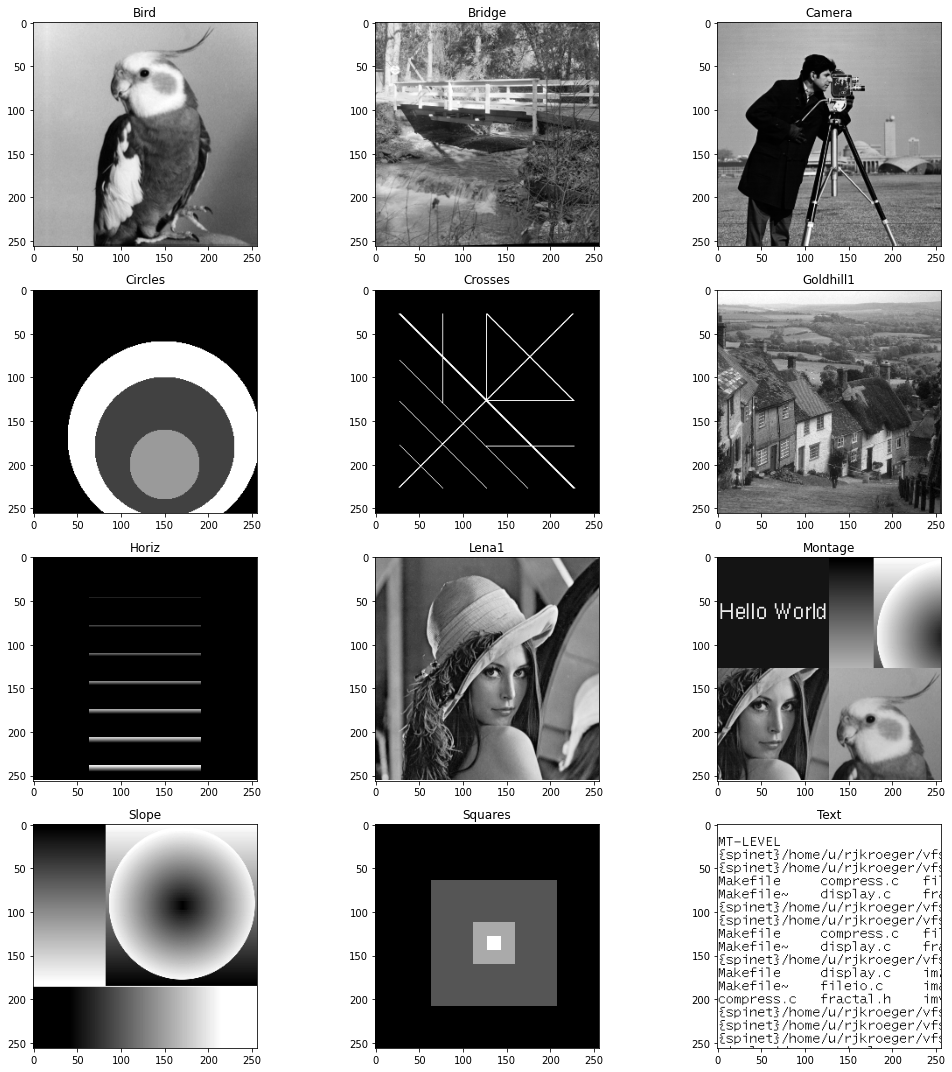

In [3]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    ax[imInd // 3, imInd % 3].imshow(np.array(im), cmap='gray')
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()




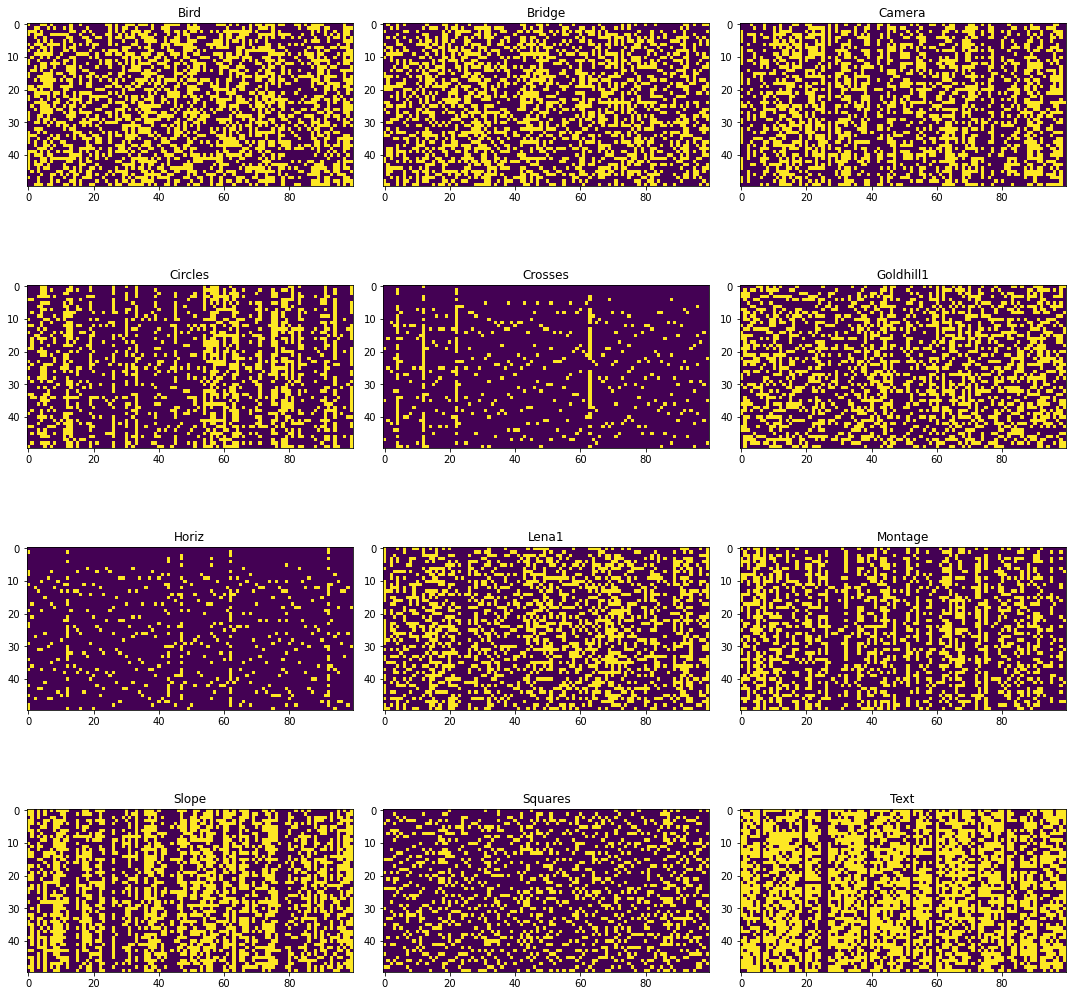

In [3]:
import torch
from encoding import TTFSEncoder, PoissonEncoder, PositionalEncoder
# image_size = 20
# encoder = NumericEncoder(7, image_size, std=10, padding=10)
# data = torch.tensor([[200, 50, 3, 44, 180],
#                      [40, 150, 32, 4, 80],
#                      [45, 40, 120, 100, 10],])

# print('pooled: ', encoder.pool(data, image_size, 'avg'))
# encoded = encoder(data)

# print(len(encoded), encoded)

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

encoder = PoissonEncoder(50, 100)

fig, ax = plt.subplots(4, 3, figsize=(15, 15))

all_ims = ['bird', 'bridge', 'camera', 'circles', 'crosses', 'goldhill1', 'horiz', 'lena1', 'montage', 'slope', 'squares', 'text']
for imInd in range(len(all_ims)):
    im = Image.open(f'images/{all_ims[imInd]}.tif')
    
    encoded = encoder(data=np.array(im), pooling='random')
    # print(encoded)

    ax[imInd // 3, imInd % 3].imshow(encoded)
    ax[imInd // 3, imInd % 3].set_title(all_ims[imInd].capitalize())

plt.tight_layout()
plt.show()



1400xBatch: 1/1 (100%) 14511.788ms


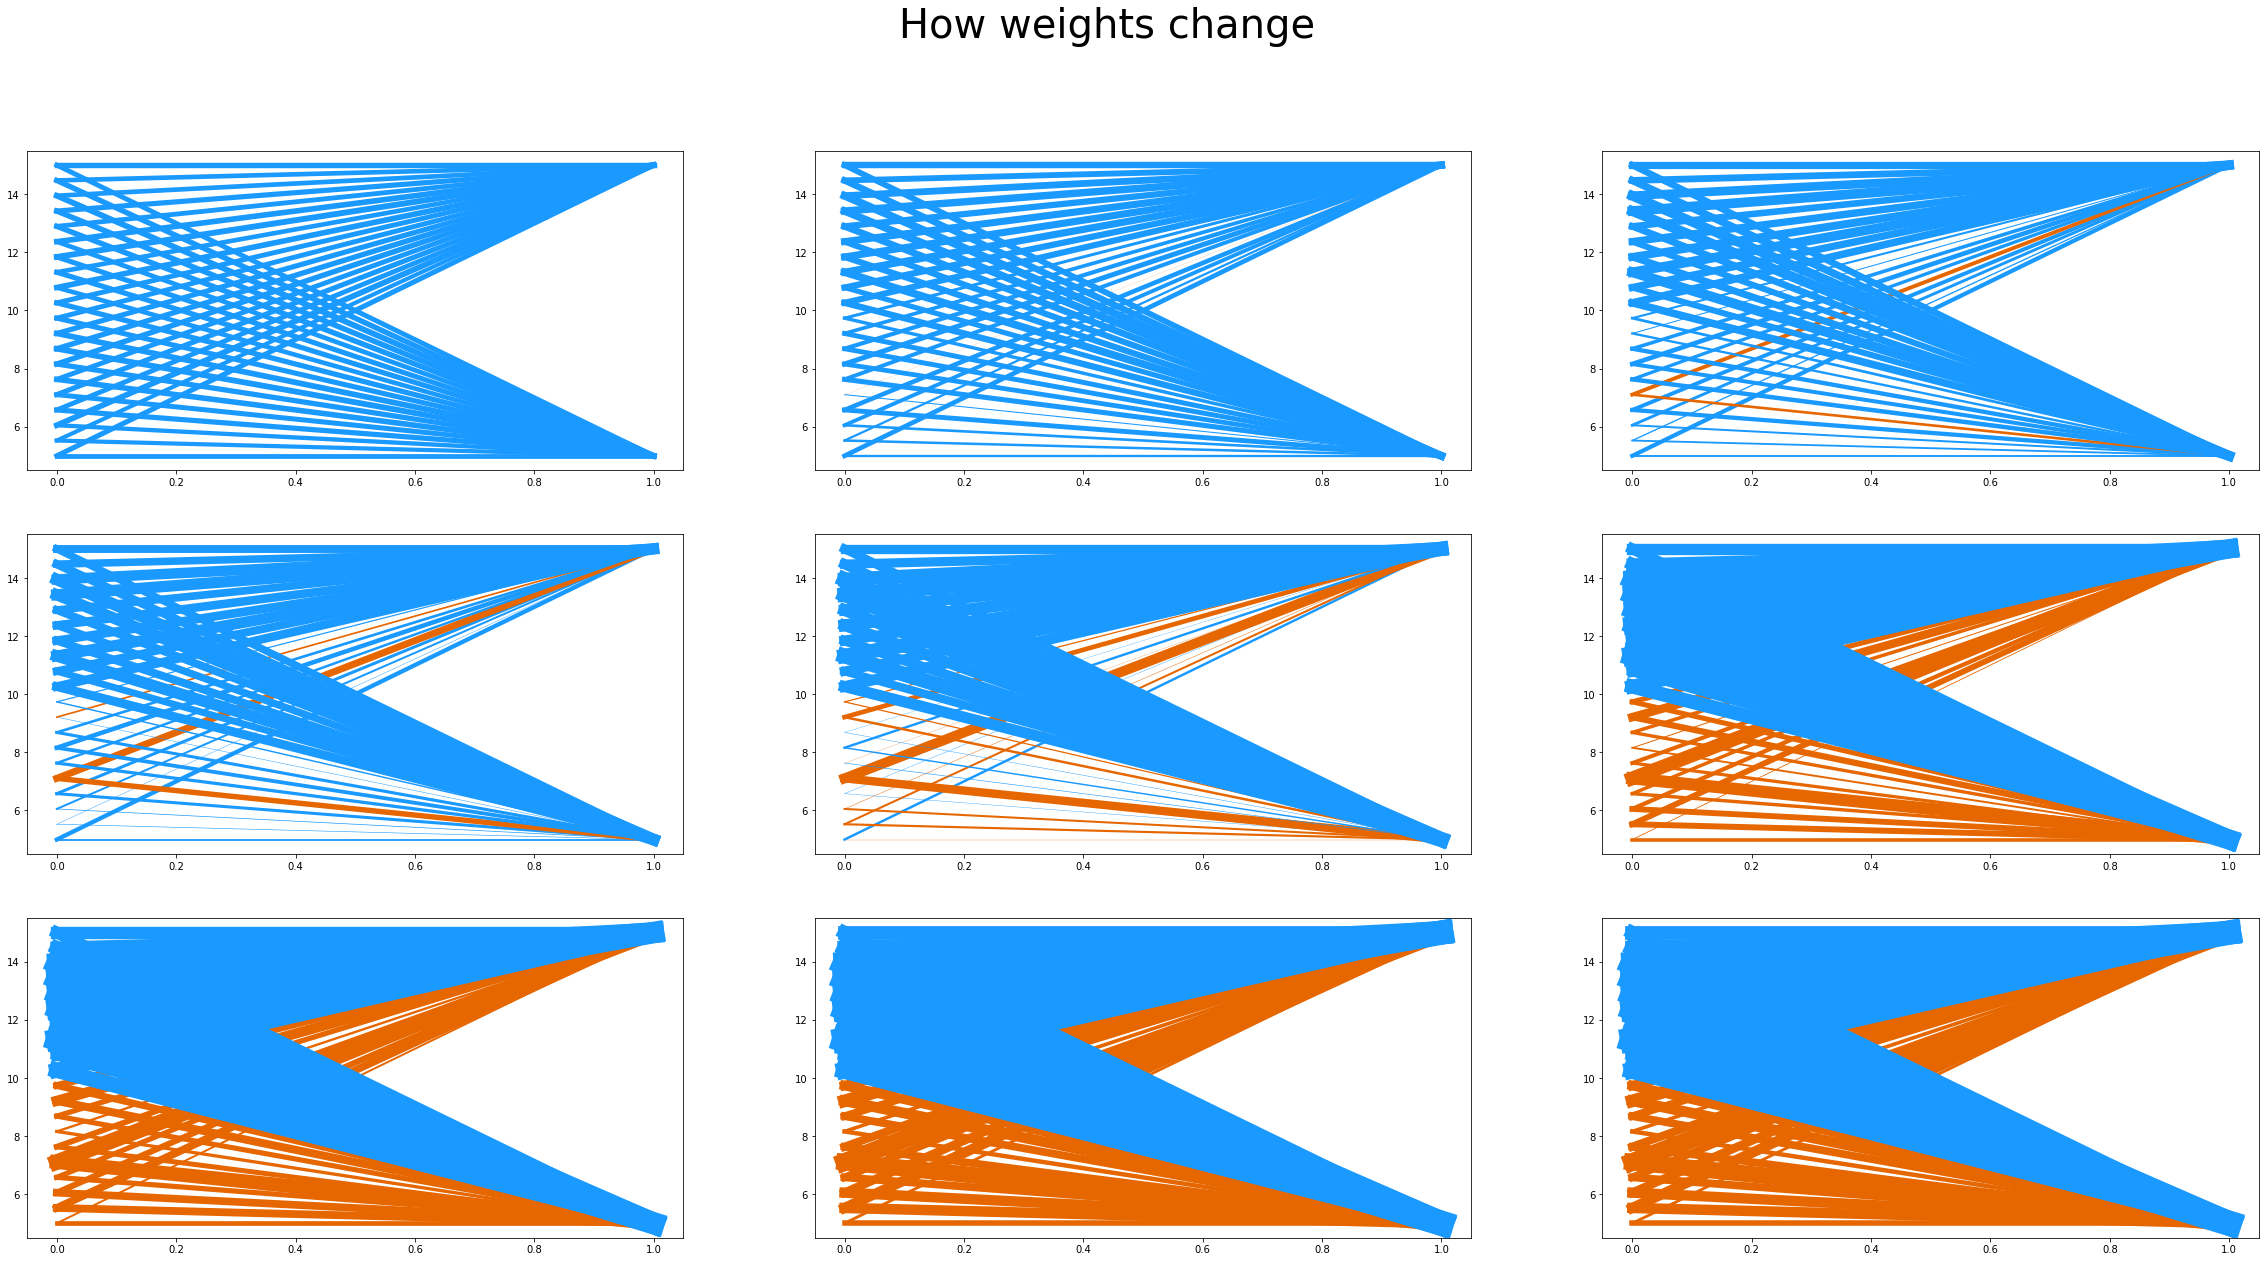

torch.Size([2234, 2])
torch.Size([752, 2])
20xBatch: 1/1 (100%) 195.328ms


In [3]:
# from experiment import learnSTDP
from stdp import STDP
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

im1 = np.array(Image.open(f'images/crosses.tif'))
im2 = np.array(Image.open(f'images/lena1.tif'))
model = STDP(syn_params={'w_mean': 50, 'flat': True, 'trace_dur': 10}, N=20, fix_image=True)

result = model.learn(im1, im2, intersection=0, image_dur=15, image_sleep=5, iters=1400, inp_amp=500, verbose=0, encoding='poisson', W_changes_step=200)
print(model.ng_inp['spike', 0].shape)
print(model.ng_out['spike', 0].shape)

ng_inp, ng_out = model.test()


torch.Size([53, 2])
tensor([[ 5,  0],
        [ 5,  1],
        [ 6,  0],
        [ 6,  1],
        [ 8,  0],
        [ 8,  1],
        [ 9,  0],
        [ 9,  1],
        [10,  0],
        [10,  1],
        [11,  0],
        [11,  1],
        [12,  0],
        [12,  1],
        [13,  0],
        [13,  1],
        [14,  0],
        [14,  1],
        [15,  0],
        [15,  1],
        [16,  0],
        [16,  1],
        [17,  0],
        [17,  1],
        [18,  0],
        [18,  1],
        [20,  0],
        [20,  1]])


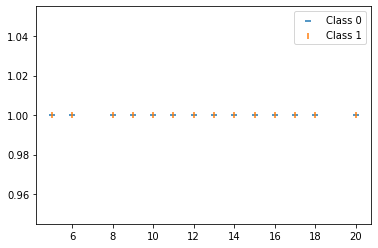

In [4]:
print(ng_inp['spike', 0].shape)
print(ng_out['spike', 0])

import torch
zeros = ng_out['spike', 0][:, 1] == 0
plt.scatter(x=ng_out['spike', 0][zeros][:, 0], y=torch.ones(zeros.sum()), marker='_')
plt.scatter(x=ng_out['spike', 0][~zeros][:, 0], y=torch.ones((~zeros).sum()), marker='|')
plt.legend(['Class 0', 'Class 1'])



In [5]:
print(f"images -> image_0: {result['images_history'].count(0)}, image_1: {result['images_history'].count(1)}")
print(f"old W:\n{result['oldW']}")
print(f"new W:\n{result['newW']}")
print(f"Diff W: \n{result['newW'] - result['oldW']}")


images -> image_0: 36, image_1: 35
old W:
tensor([[47.7952, 50.8982],
        [41.9246, 41.0044],
        [43.2312, 57.0393],
        [52.2239, 48.0747],
        [50.1228, 50.8822],
        [55.5864, 48.3426],
        [52.4666, 53.9583],
        [58.2165, 53.3189],
        [56.9527, 51.3111],
        [51.0109, 48.8596],
        [52.1746, 49.2518],
        [45.7371, 56.0753],
        [51.5007, 46.1149],
        [50.4408, 58.8356],
        [46.5472, 56.0629],
        [54.1181, 48.0591],
        [54.7459, 51.9213],
        [58.0000, 46.7713],
        [54.0471, 46.4588],
        [49.1576, 54.4856]])
new W:
tensor([[ -55.0695,  -28.9353],
        [-104.7219, -102.1618],
        [-103.4153,  -86.1269],
        [ -77.9190,  -76.5959],
        [-166.2386, -180.0070],
        [ -76.0001,  -82.4875],
        [ -44.4492,  -36.3152],
        [ -77.3701,  -77.3707],
        [-106.5239, -126.6931],
        [ -95.6355,  -94.3066],
        [ 174.2413,  168.9131],
        [ 126.4094,  136.5020],
      

tensor([ 5.0000,  5.5263,  6.0526,  6.5789,  7.1053,  7.6316,  8.1579,  8.6842,
         9.2105,  9.7368, 10.2632, 10.7895, 11.3158, 11.8421, 12.3684, 12.8947,
        13.4211, 13.9474, 14.4737, 15.0000])
tensor([ 5., 15.])


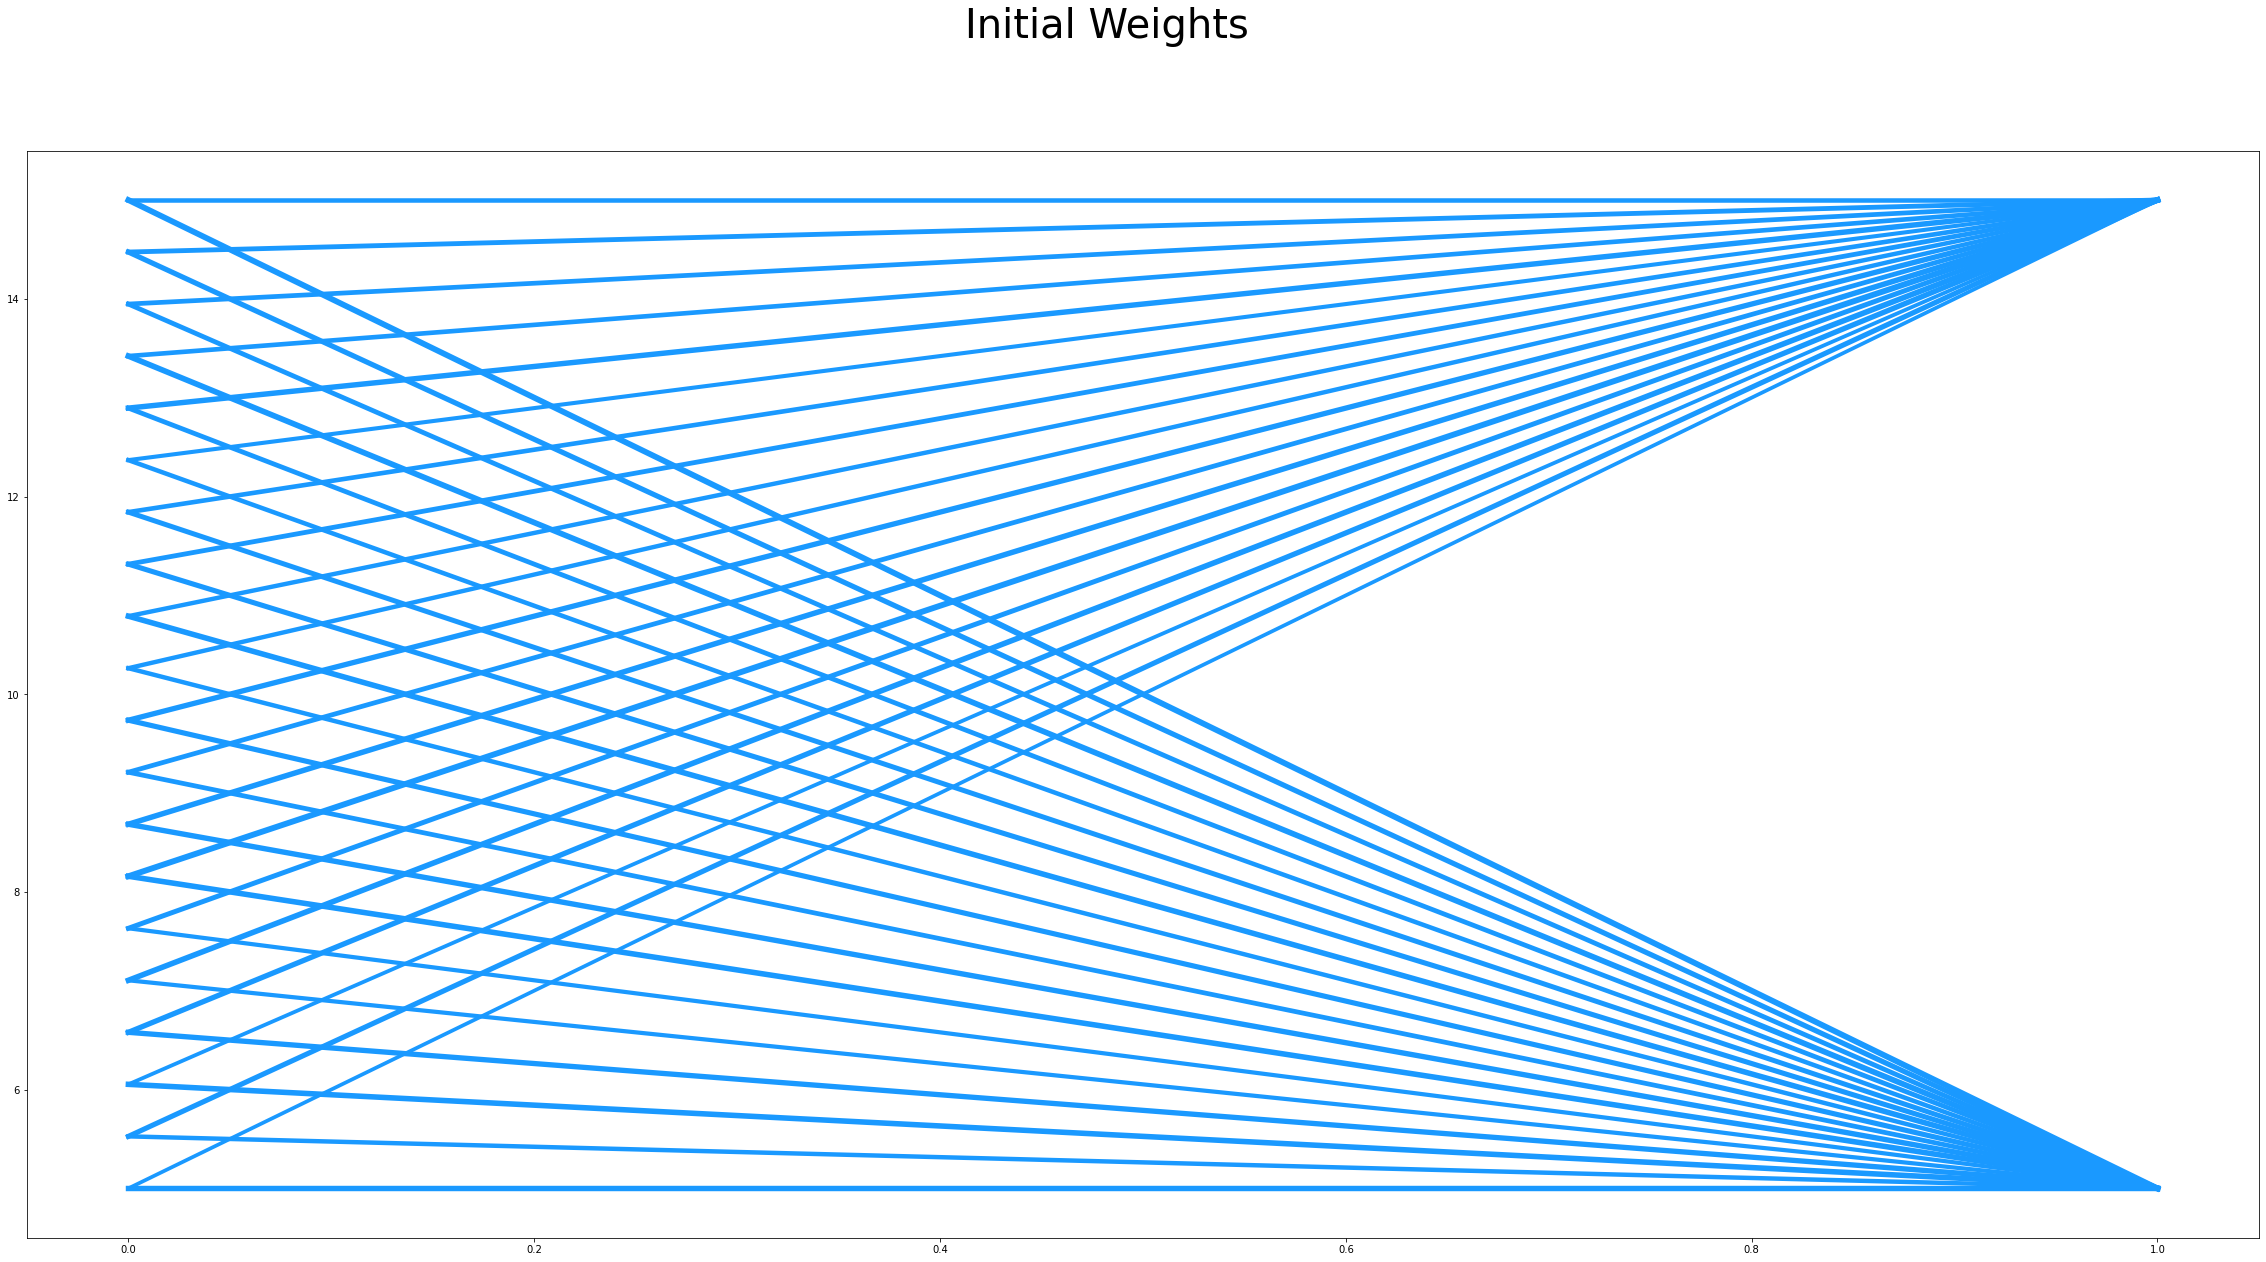

tensor([ 5.0000,  5.5263,  6.0526,  6.5789,  7.1053,  7.6316,  8.1579,  8.6842,
         9.2105,  9.7368, 10.2632, 10.7895, 11.3158, 11.8421, 12.3684, 12.8947,
        13.4211, 13.9474, 14.4737, 15.0000])
tensor([ 5., 15.])


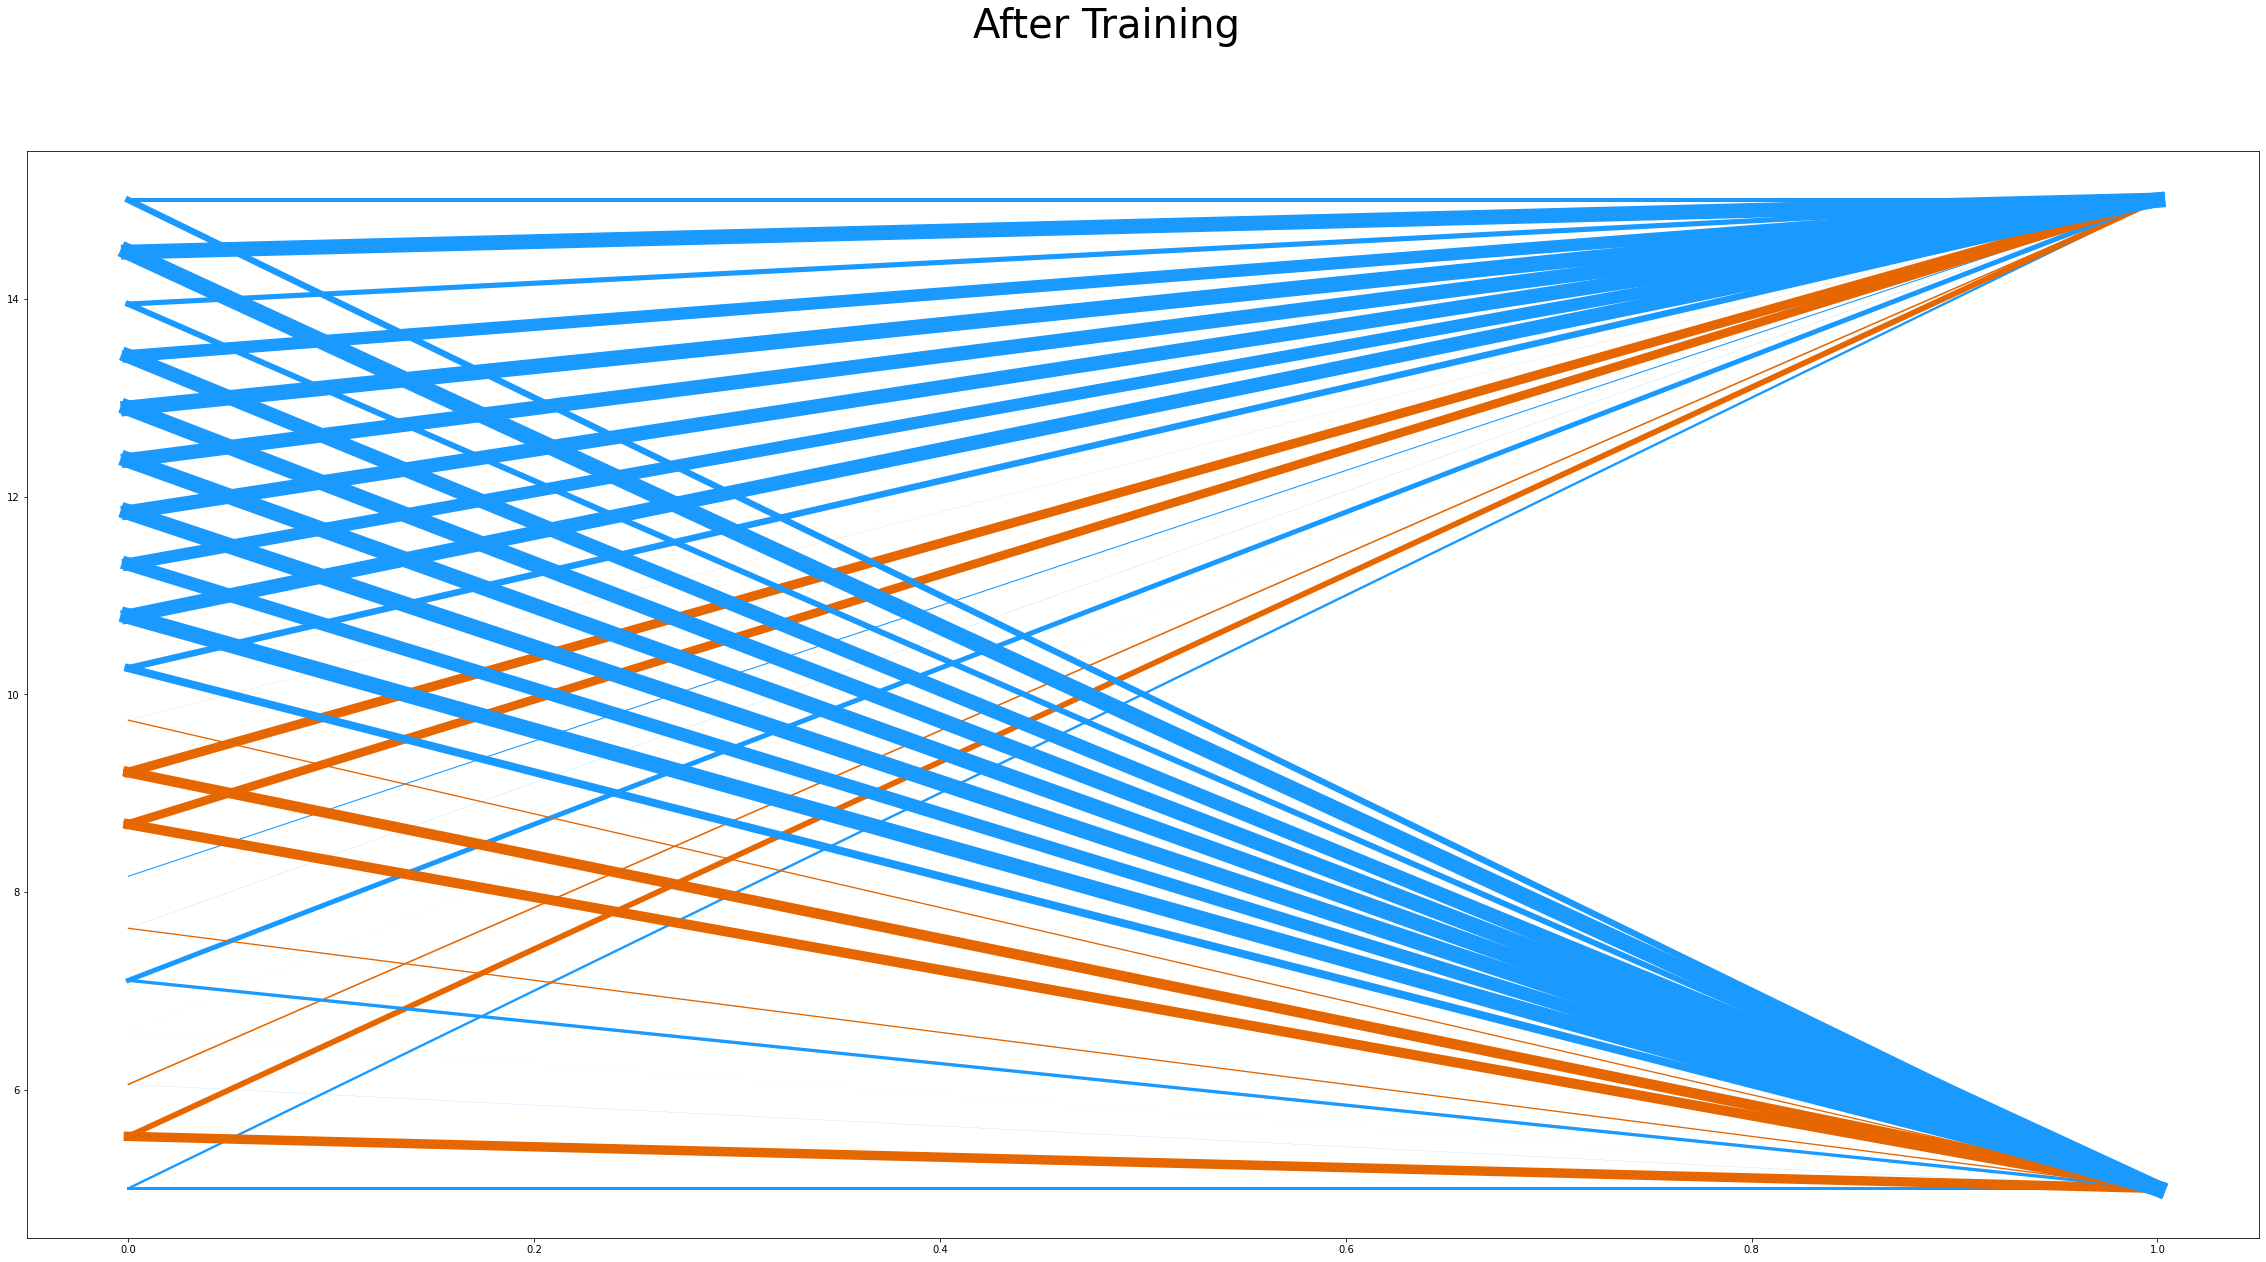

In [32]:
# from vis import draw_weights
import matplotlib.pyplot as plt
import torch
import numpy as np
from vis import draw_weights

draw_weights(result['oldW'], scale_w=10, title="Initial Weights")
draw_weights(result['newW'], scale_w=10, title="After Training")

